In [69]:
from datascience import *
import numpy as np
import math
import scipy.stats as stats
import pandas as pd

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
medal = Table.read_table('summer.csv')
medal1 = medal.where('Year',are.above(1992)).where('Country', are.containing('USA') | are.containing('CHN') 
                    | are.containing('AUS') | are.containing('FRA') | are.containing('JPN') 
                    | are.containing('GER') | are.containing('RUS') | are.containing('ITA') 
                    | are.containing('KR') | are.containing('GBR'))
medal1

Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
1996,Atlanta,Aquatics,Diving,"XIAO, Hailiang",CHN,Men,10M Platform,Bronze
1996,Atlanta,Aquatics,Diving,"SAUTIN, Dmitry",RUS,Men,10M Platform,Gold
1996,Atlanta,Aquatics,Diving,"HEMPEL, Jan",GER,Men,10M Platform,Silver
1996,Atlanta,Aquatics,Diving,"CLARK, Mary Ellen",USA,Women,10M Platform,Bronze
1996,Atlanta,Aquatics,Diving,"FU, Mingxia",CHN,Women,10M Platform,Gold
1996,Atlanta,Aquatics,Diving,"WALTER, Annika",GER,Women,10M Platform,Silver
1996,Atlanta,Aquatics,Diving,"LENZI, Mark Edward",USA,Men,3M Springboard,Bronze
1996,Atlanta,Aquatics,Diving,"XIONG, Ni",CHN,Men,3M Springboard,Gold
1996,Atlanta,Aquatics,Diving,"YU, Zhuocheng",CHN,Men,3M Springboard,Silver
1996,Atlanta,Aquatics,Diving,"FU, Mingxia",CHN,Women,3M Springboard,Gold


In [6]:
dictionary = Table.read_table("dictionary.csv")
dictionary

Country,Code,Population,GDP per Capita
Afghanistan,AFG,3.25266e+07,594.323
Albania,ALB,2.88917e+06,3945.22
Algeria,ALG,3.96665e+07,4206.03
American Samoa*,ASA,55538,nan
Andorra,AND,70473,nan
Angola,ANG,2.5022e+07,4101.47
Antigua and Barbuda,ANT,91818,13714.7
Argentina,ARG,4.34168e+07,13431.9
Armenia,ARM,3.01771e+06,3489.13
Aruba*,ARU,103889,nan


In [18]:
medal2 = medal.where('Year',are.equal_to(2012))
medal2

Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
2012,London,Aquatics,Diving,"BOUDIA, David",USA,Men,10M Platform,Gold
2012,London,Aquatics,Diving,"QIU, Bo",CHN,Men,10M Platform,Silver
2012,London,Aquatics,Diving,"DALEY, Thomas",GBR,Men,10M Platform,Bronze
2012,London,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10M Platform,Gold
2012,London,Aquatics,Diving,"BROBEN, Brittany",AUS,Women,10M Platform,Silver
2012,London,Aquatics,Diving,"PAMG, Pandelela Rinong",MAS,Women,10M Platform,Bronze
2012,London,Aquatics,Diving,"ZAKHAROV, Ilya",RUS,Men,3M Springboard,Gold
2012,London,Aquatics,Diving,"QIN, Kai",CHN,Men,3M Springboard,Silver
2012,London,Aquatics,Diving,"HE, Chong",CHN,Men,3M Springboard,Bronze
2012,London,Aquatics,Diving,"WU, Minxia",CHN,Women,3M Springboard,Gold


In [30]:
medal3 = medal2.group("Country")
medal3

Country,count
AFG,1
ALG,1
ARG,20
ARM,2
AUS,114
AZE,10
BAH,4
BEL,3
BLR,21
BOT,1


In [31]:
medal5 = medal3.relabel("Country","Code")
medal5

Code,count
AFG,1
ALG,1
ARG,20
ARM,2
AUS,114
AZE,10
BAH,4
BEL,3
BLR,21
BOT,1


In [32]:
Code_array = medal4.column(0)
Code_array

array(['AFG', 'ALG', 'ARG', 'ARM', 'AUS', 'AZE', 'BAH', 'BEL', 'BLR',
       'BOT', 'BRA', 'BRN', 'BUL', 'CAN', 'CHN', 'CMR', 'COL', 'CRO',
       'CUB', 'CYP', 'CZE', 'DEN', 'DOM', 'EGY', 'ESP', 'EST', 'ETH',
       'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GER', 'GRE', 'GRN', 'GUA',
       'HKG', 'HUN', 'INA', 'IND', 'IRI', 'IRL', 'ITA', 'JAM', 'JPN',
       'KAZ', 'KEN', 'KOR', 'KSA', 'KUW', 'LAT', 'LTU', 'MAR', 'MAS',
       'MEX', 'MGL', 'NED', 'NOR', 'NZL', 'POL', 'POR', 'PRK', 'PUR',
       'QAT', 'RSA', 'RUS', 'SLO', 'SUI', 'SVK', 'SWE', 'THA', 'TJK',
       'TPE', 'TUN', 'TUR', 'UGA', 'UKR', 'USA', 'UZB', 'VEN'],
      dtype='<U3')

In [33]:
medal4 = dictionary.join("Code",medal5)
medal4

Code,Country,Population,GDP per Capita,count
AFG,Afghanistan,3.25266e+07,594.323,1
ALG,Algeria,3.96665e+07,4206.03,1
ARG,Argentina,4.34168e+07,13431.9,20
ARM,Armenia,3.01771e+06,3489.13,2
AUS,Australia,2.37812e+07,56311,114
AZE,Azerbaijan,9.65135e+06,5496.34,10
BAH,Bahamas,388019,22817.2,4
BEL,Belgium,1.12857e+07,40324,3
BLR,Belarus,9.513e+06,5740.46,21
BOT,Botswana,2.26248e+06,6360.14,1


In [36]:
Pop_vs_medal = medal4.select("Population","count")
Pop_vs_medal

Population,count
3.25266e+07,1
3.96665e+07,1
4.34168e+07,20
3.01771e+06,2
2.37812e+07,114
9.65135e+06,10
388019,4
1.12857e+07,3
9.513e+06,21
2.26248e+06,1


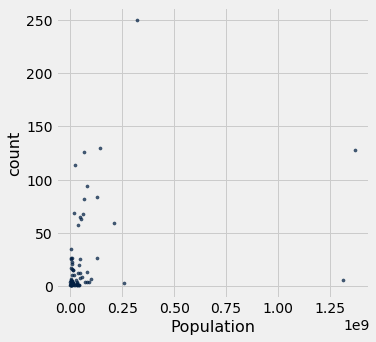

In [38]:
Pop_vs_medal.scatter('Population', 'count', s=10)

In [72]:
GDP_vs_medal = medal4.select("GDP per Capita","count")
GDP_vs_medal.show(20)

GDP per Capita,count
594.323,1
4206.03,1
13431.9,20
3489.13,2
56311,114
5496.34,10
22817.2,4
40324,3
5740.46,21
6360.14,1


In [73]:
medal4.to_csv("GDP,POP,MEDALS")

In [76]:
df = pd.read_csv("GDP,POP,MEDALS")
df

,Code,Country,Population,GDP per Capita,count
0,AFG,Afghanistan,3.252656e+07,594.323081,1
1,ALG,Algeria,3.966652e+07,4206.031232,1
2,ARG,Argentina,4.341676e+07,13431.878340,20
3,ARM,Armenia,3.017712e+06,3489.127690,2
4,AUS,Australia,2.378117e+07,56310.962993,114
5,AZE,Azerbaijan,9.651349e+06,5496.344640,10
6,BAH,Bahamas,3.880190e+05,22817.230857,4
7,BEL,Belgium,1.128572e+07,40324.027766,3
8,BLR,Belarus,9.513000e+06,5740.456495,21
9,BOT,Botswana,2.262485e+06,6360.138220,1


In [90]:
df=df.dropna(axis=0)
df

,Code,Country,Population,GDP per Capita,count
0,AFG,Afghanistan,3.252656e+07,594.323081,1
1,ALG,Algeria,3.966652e+07,4206.031232,1
2,ARG,Argentina,4.341676e+07,13431.878340,20
3,ARM,Armenia,3.017712e+06,3489.127690,2
4,AUS,Australia,2.378117e+07,56310.962993,114
5,AZE,Azerbaijan,9.651349e+06,5496.344640,10
6,BAH,Bahamas,3.880190e+05,22817.230857,4
7,BEL,Belgium,1.128572e+07,40324.027766,3
8,BLR,Belarus,9.513000e+06,5740.456495,21
9,BOT,Botswana,2.262485e+06,6360.138220,1


In [91]:
df.to_csv("df")

In [92]:
table =  Table.read_table('df')
table.show()

Unnamed: 0,Code,Country,Population,GDP per Capita,count
0,AFG,Afghanistan,3.25266e+07,594.323,1
1,ALG,Algeria,3.96665e+07,4206.03,1
2,ARG,Argentina,4.34168e+07,13431.9,20
3,ARM,Armenia,3.01771e+06,3489.13,2
4,AUS,Australia,2.37812e+07,56311,114
5,AZE,Azerbaijan,9.65135e+06,5496.34,10
6,BAH,Bahamas,388019,22817.2,4
7,BEL,Belgium,1.12857e+07,40324,3
8,BLR,Belarus,9.513e+06,5740.46,21
9,BOT,Botswana,2.26248e+06,6360.14,1


In [93]:
corr_pop, _ = stats.pearsonr(table.column(3), table.column(5))
corr_pop                                                                        

0.3195516154917849

In [95]:
corr_gdp, _ = stats.pearsonr(table.column(4), table.column(5))
corr_gdp

0.3364644635461069

In [96]:
table_1 = table.with_column("pop*gdp",table.column(3)*table.column(4))
table_1

Unnamed: 0,Code,Country,Population,GDP per Capita,count,pop*gdp
0,AFG,Afghanistan,3.25266e+07,594.323,1,1.93313e+10
1,ALG,Algeria,3.96665e+07,4206.03,1,1.66839e+11
2,ARG,Argentina,4.34168e+07,13431.9,20,5.83169e+11
3,ARM,Armenia,3.01771e+06,3489.13,2,1.05292e+10
4,AUS,Australia,2.37812e+07,56311,114,1.33914e+12
5,AZE,Azerbaijan,9.65135e+06,5496.34,10,5.30471e+10
6,BAH,Bahamas,388019,22817.2,4,8.85352e+09
7,BEL,Belgium,1.12857e+07,40324,3,4.55086e+11
8,BLR,Belarus,9.513e+06,5740.46,21,5.4609e+10
9,BOT,Botswana,2.26248e+06,6360.14,1,1.43897e+10


In [97]:
corr_pop_gdp, _ = stats.pearsonr(table_1.column(6), table_1.column(5))
corr_pop_gdp

0.8291630330280012

## Number of medals has strong association with total gdp.

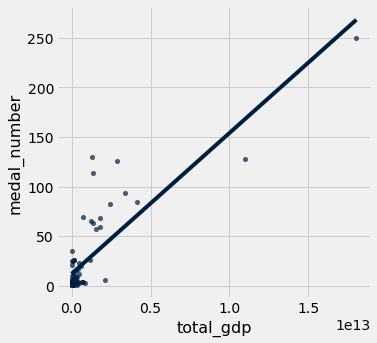

In [105]:
table_2 = table_1.select("count","pop*gdp")
table_2 = table_2.relabel("pop*gdp","total_gdp").relabel("count","medal_number")
table_2.scatter('total_gdp', fit_line=True)

In [108]:
import statsmodels.formula.api as smf

table_2_df = table_2.to_df()
result = smf.ols(formula="medal_number ~ total_gdp", data=table_2_df).fit()

print(result.params)

Intercept    1.210501e+01
total_gdp    1.419600e-11
dtype: float64


# Regression Diagnostics

In [109]:
table_2 = table_2.with_columns(
        'Fitted Value', result.predict(),
        'Residual', table_2.column('medal_number') - result.predict())
table_2

medal_number,total_gdp,Fitted Value,Residual
1,1.93313e+10,12.3794,-11.3794
1,1.66839e+11,14.4734,-13.4734
20,5.83169e+11,20.3837,-0.383668
2,1.05292e+10,12.2545,-10.2545
114,1.33914e+12,31.1154,82.8846
10,5.30471e+10,12.8581,-2.85807
4,8.85352e+09,12.2307,-8.23069
3,4.55086e+11,18.5654,-15.5654
21,5.4609e+10,12.8802,8.11976
1,1.43897e+10,12.3093,-11.3093


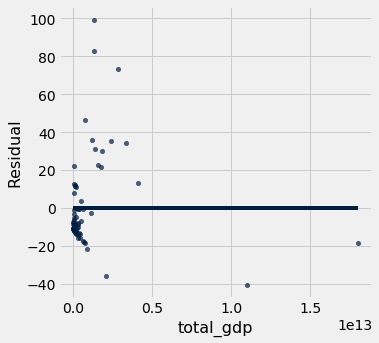

In [111]:
table_2.scatter('total_gdp', 'Residual', fit_line=True)

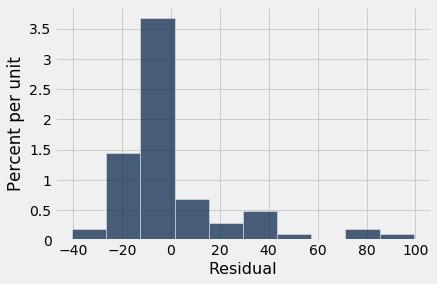

In [115]:
table_2.hist('Residual',bins=10)

In [116]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           medal_number   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     158.4
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.32e-20
Time:                        12:42:06   Log-Likelihood:                -339.32
No. Observations:                  74   AIC:                             682.6
Df Residuals:                      72   BIC:                             687.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1050      2.976      4.067      0.000       6.172      18.038
total_gdp    1.42e-11   1.13e-12     12.586      0.000    1.19e-11    1.64e-11
==============================================================================
Omnibus:                       46.623   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.565
Skew:                           2.097   Prob(JB):                     3.65e-30
Kurtosis:                       8.135   Cond. No.                     2.81e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""